# Mathematical Underpinnings - Lab 4

In [195]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mutual_info_score
import seaborn as sns
import pandas as pd
from tqdm import tqdm

## Task 1

### a)

#### bp 1)

In [196]:
# a heatmap
# you may use pcolormesh function and draw a heatmap for a sample
# or draw a heatmap for a teoretic density function

# I give you an answer to that task, because it may take too much time to do it during labs. 

In [199]:
def plot_xyz(data_2d, nbins=300):
    x = data_2d[:,0]
    y = data_2d[:,1]
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    return xi, yi, zi

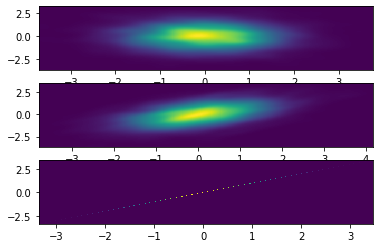

In [200]:
fig, axs = plt.subplots(3)

n = 5000

data_2d_0 = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
xi_0, yi_0, zi_0 = plot_xyz(data_2d_0)
data_2d_1 = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
xi_1, yi_1, zi_1 = plot_xyz(data_2d_1)
data_2d_2 = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)
xi_2, yi_2, zi_2 = plot_xyz(data_2d_2)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2)

In [201]:
data = [data_2d_0, data_2d_1, data_2d_2]
corrs = []
mi = []
for d in data:
    corrs.append(pearsonr(d[:, 0], d[:, 1]))
    _, bin_edges_0 = np.histogram(d[:, 0], bins=10)
    _, bin_edges_1 = np.histogram(d[:, 1], bins=10)
    
    d0 = np.digitize(d[:, 0], bin_edges_0)
    d1 = np.digitize(d[:, 1], bin_edges_1)
    mi.append(mutual_info_score(d0, d1))

In [202]:
corrs = [corr[0] for corr in corrs]

In [203]:
corrs

[-0.028213755908794682, 0.5042927030663714, 0.9999999999999998]

In [204]:
mi

[0.007490660954704213, 0.137590549862863, 1.826154909487724]

#### bp 3)

In [205]:
corrs = []
mis = []
ps = [0, 0.1, 0.3, 0.5, 0.7, 0.8, 0.9, 0.99]
n = 5000
for p in ps:
    _corrs = []
    _mis = []
    for i in tqdm(range(100), f"Calculating {p}"): 
        data = np.random.multivariate_normal(np.zeros(2), np.array([[1, p], [p, 1]]), n)
        _corrs.append(pearsonr(data[:, 0], data[:, 1])[0])

        _, bin_edges_0 = np.histogram(data[:, 0], bins=10)
        _, bin_edges_1 = np.histogram(data[:, 1], bins=10)

        d0 = np.digitize(data[:, 0], bin_edges_0)
        d1 = np.digitize(data[:, 1], bin_edges_1)
        _mis.append(mutual_info_score(d0, d1))
    corrs.append(np.mean(_corrs))
    mis.append(np.mean(_mis))

Calculating 0.99: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 444.45it/s]


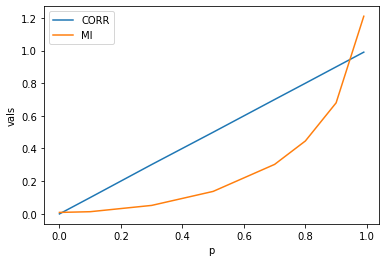

In [206]:
plt.plot(ps, corrs)
plt.plot(ps, mis)
plt.legend(["CORR", "MI"])
plt.xlabel("p")
plt.ylabel("vals")
plt.show()

#### bp 4)

A hint: note that mutual information between two correlated normal distributions i.e. when $(X, Y)\sim \mathcal{N}((0,0)', \Sigma)$ and
$$\Sigma = \begin{pmatrix}
        \sigma_x^2 & \rho \\ \rho & \sigma_y^2
    \end{pmatrix}$$
equals
$$I(X,Y) = \frac{1}{2}\log \left(\frac{\sigma_x^2\sigma_y^2}{\sigma_x^2\sigma_y^2 - \rho^2}\right).$$

In [207]:
f = lambda x: -np.log(1 - x**2) /2
fun_p_orig = [f(x) for x in ps]
fun_p_corr = [f(x) for x in corrs]

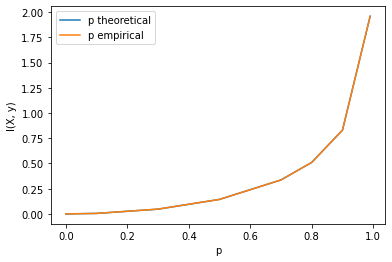

In [208]:
plt.plot(ps, fun_p_orig)
plt.plot(ps, fun_p_corr)
plt.legend(["p theoretical", "p empirical"])
plt.xlabel("p")
plt.ylabel("I(X, y)")
plt.show()

### b)

#### bp 1)

In [11]:
# again: this is too time consuming so here is an answer

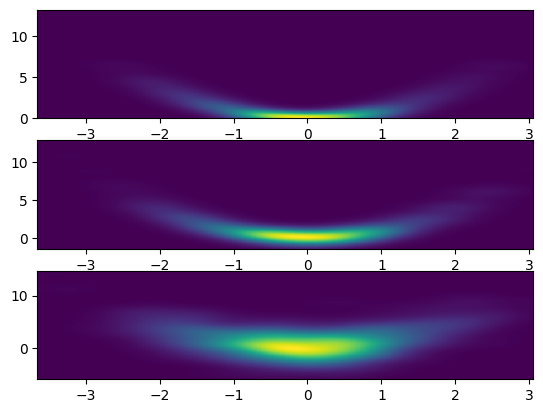

In [12]:
fig, axs = plt.subplots(3)

n = 1000
x = np.random.normal(0, 1, n)

data_2d = np.array([x, x**2 + np.random.normal(0, 0, n)]).T
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 0.5, n)]).T
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 2, n)]).T
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2) and 3)

In [87]:
eps_seq = np.exp(np.linspace(0, 1, 10))
n = 1000
N = 100

cor_pearson_results = np.zeros((N, np.shape(eps_seq)[0]))
mi_results = np.zeros((N, np.shape(eps_seq)[0]))

for i in range(np.shape(rho_seq)[0]):
    eps = eps_seq[i]
    for j in range(N):
        x = np.random.normal(0, 1, n)
        y = x**2 + np.random.normal(0, eps, n)

        cor_pearson_results[j, i] = pearsonr(x, y)[0]

        x_bins = np.linspace(x.min(), x.max(), 10)
        y_bins = np.linspace(y.min(), y.max(), 10)

        x_discrete = np.digitize(data_2d[:,0], bins=x_bins)
        y_discrete = np.digitize(data_2d[:,1], bins=y_bins)

        mi_results[j, i] = mutual_info_score(x_discrete, y_discrete)

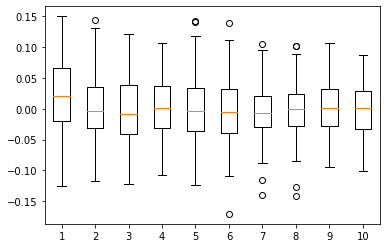

In [100]:
plt.boxplot(cor_pearson_results)
plt.show()

## Task 2

### a)

In [232]:
def indep_test_asymptotic(X, Y, stat):
    _, bin_edges_0 = np.histogram(X, bins=10)
    _, bin_edges_1 = np.histogram(Y, bins=10)

    X = np.digitize(X, bin_edges_0)
    Y = np.digitize(Y, bin_edges_1)

    if stat == "mi":

        stat_value = 2*len(X)*mutual_info_score(X, Y)

    if stat == "chi2":

        test_res = (chi2_contingency(pd.crosstab(X, Y)))
        stat_value = test_res[0]

    df = (len(np.unique(X)) - 1)*(len(np.unique(Y)) - 1)

    p_value = 1 - chi2.cdf(stat_value, df=df)

    return stat_value, p_value

### b)

In [233]:
def indep_test_permutation(X, Y, B=100, stat="mi"):
    _, bin_edges_0 = np.histogram(X, bins=10)
    _, bin_edges_1 = np.histogram(Y, bins=10)
    X = np.digitize(X, bin_edges_0)
    Y = np.digitize(Y, bin_edges_1)
    
    stat_value = mutual_info_score(X, Y)

    condition_p_value = 0
    for b in range(B):
        X_b = np.random.permutation(X)

        stat_value_b = mutual_info_score(X_b, Y)

        if stat_value <= stat_value_b:
            condition_p_value += 1

    p_value = (1 + condition_p_value)/(1 + B)

    return 2*len(X)*stat_value, p_value

### c)

**Independent r.v.**

A hint: two discretized independent normal random variables (or any two independent discrete r.v.)

In [234]:
independent = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)

In [235]:
print(f"MI indep. test: {indep_test_asymptotic(independent[:, 0], independent[:, 1], 'mi')}")
print(f"Chi2 indep. test: {indep_test_asymptotic(independent[:, 0], independent[:, 1], 'chi2')}")
print(f"Permutation test: {indep_test_permutation(independent[:, 0], independent[:, 1])}")

MI indep. test: (72.95675694618619, 0.9807714786539613)
Chi2 indep. test: (83.66239769106394, 0.8804205534637229)
Permutation test: (72.95675694618619, 0.7920792079207921)


**Dependent r.v.**

A hint: two discretized dependent normal random variables (or two categorical wuch that we enforce $X=Y$ for a subset of observations)

In [236]:
dependent = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)

In [237]:
print(f"MI indep. test: {indep_test_asymptotic(dependent[:, 0], dependent[:, 1], 'mi')}")
print(f"Chi2 indep. test: {indep_test_asymptotic(dependent[:, 0], dependent[:, 1], 'chi2')}")
print(f"Permutation test: {indep_test_permutation(dependent[:, 0], dependent[:, 1])}")

MI indep. test: (1404.3302200482738, 0.0)
Chi2 indep. test: (1533.8155984897676, 0.0)
Permutation test: (1404.3302200482738, 0.009900990099009901)
